In [2]:
import matplotlib.pyplot as plt
import numpy as np
from geopy import geocoders
import geonamescache
from geonamescache.mappers import country

In [1]:
group1 = ['India', 'Mumbai', 'Pune', 'Kolkata', 'Delhi', 'Banglore', 'Punjab']
group2 = ['USA' , 'Canada']
group3 = ['Pakistan']


In [ ]:
df1 = pd.read_csv('../Anti-National-Tweets-Classification/dataset/raw_dataset/')
df2 = pd.read_csv('../Anti-National-Tweets-Classification/dataset/raw_dataset/')
df_main = df2.append(df1, ignore_index = True)
df_main

In [ ]:
user_locations = df_main[- df_main['author'] == 'NaN']
location_list = []

for i in location

In [ ]:
for country in country_list:
    place, (lat, lng) = gn.geocode(country)
    print(place)

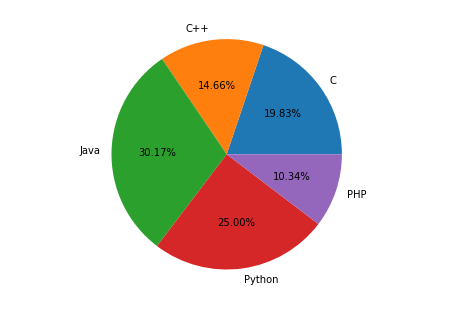

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie( data , labels = label_list ,autopct='%1.2f%%')
plt.show()